# 🎯 금연 성공 예측 프로젝트 - EDA 발표

**발표자:** 오흥재 (vfxpedia)  
**일자:** 2025-10-14  
**주제:** 교육 및 경제활동 Feature Engineering

---

## 📋 발표 구성

```
1. 문제 정의 & 프로젝트 개요
2. 데이터 정제 과정
3. 원본 데이터 문제점 (Before) ⚠️
4. Feature Engineering 수행 🔧
5. 개선 효과 (After) ✅  
6. 핵심 인사이트 💡
7. 모델 학습 준비 🚀
```

---
## 1️⃣ 환경 설정


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
import os
import matplotlib.font_manager as fm
try:
    font_path = r'C:\Windows\Fonts\HMFMMUEX.TTC'
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
except:
    plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (16, 9)

# 색상 팔레트
COLORS = {
    'before': '#ff7f0e',
    'after': '#2ca02c',
    'high': '#d62728',
    'mid': '#ff7f0e',
    'low': '#2ca02c',
    'palette': ['#2ca02c', '#ff7f0e', '#d62728']
}

print('✅ 환경 설정 완료 - 발표 준비 완료!')


✅ 환경 설정 완료 - 발표 준비 완료!


## 2️⃣ Chapter 1: 문제 정의



### 🎯 프로젝트 목표

**금연 성공 여부 예측 모델 개발**

**목적:**
- 금연 성공 가능성이 높은 사람 vs 낮은 사람 식별
- 고위험군에 대한 맞춤형 금연 프로그램 제공
- 효과적인 금연 정책 수립 지원

**기대 효과:**
- 금연 성공률 향상
- 국민 건강 증진



In [11]:
# 데이터 개요 시각화
print("=" * 70)
print("📊 데이터 개요")
print("=" * 70)

data_info = {
    '출처': '질병관리청 국민건강영양조사',
    '전체 인원': '89,822명',
    '전체 변수': '210개',
    '타겟 변수': 'churn (금연 성공 여부)',
    '성공(1)': '49,251명 (54.8%)',
    '실패(0)': '40,571명 (45.2%)'
}

for key, value in data_info.items():
    print(f"{key:15s}: {value}")

print("\n" + "=" * 70)
print("👤 담당 영역: 교육 및 경제활동 관련 변수 (5개)")
print("=" * 70)

담당_변수 = [
    ('sob_01z1', '교육수준', 10),
    ('soa_01z1', '경제활동여부', 4),
    ('soa_06z2', '직업분류', 13),
    ('soa_07z1', '종사상지위', 6),
    ('sod_02z3', '혼인상태', 7)
]

for var, name, cats in 담당_변수:
    print(f"   {var}: {name} ({cats}개 카테고리)")

print("=" * 70)


📊 데이터 개요
출처             : 질병관리청 국민건강영양조사
전체 인원          : 89,822명
전체 변수          : 210개
타겟 변수          : churn (금연 성공 여부)
성공(1)          : 49,251명 (54.8%)
실패(0)          : 40,571명 (45.2%)

👤 담당 영역: 교육 및 경제활동 관련 변수 (5개)
   sob_01z1: 교육수준 (10개 카테고리)
   soa_01z1: 경제활동여부 (4개 카테고리)
   soa_06z2: 직업분류 (13개 카테고리)
   soa_07z1: 종사상지위 (6개 카테고리)
   sod_02z3: 혼인상태 (7개 카테고리)


## 3️⃣ Chapter 2: 데이터 정제 과정


In [ ]:
# 데이터 정제 프로세스 흐름도
print("=" * 70)
print("📊 데이터 정제 프로세스")
print("=" * 70)
print()
print("1️⃣ raw_data.csv")
print("   ├─ 규모: 231,728 rows × 209 columns")
print("   └─ 상태: 원본 데이터")
print()
print("        ↓ (타겟 변수 생성: churn)")
print()
print("2️⃣ analy_data_v2.csv")
print("   ├─ 규모: 89,822 rows × 210 columns")
print("   ├─ 추가: churn (금연 성공 여부)")
print("   │  ├─ 0 (실패): 40,571명 (45.2%)")
print("   │  └─ 1 (성공): 49,251명 (54.8%)")
print("   └─ 상태: 과거흡연자 정의 + 액상형 로직 수정")
print()
print("        ↓ (공통 전처리: 'b'삭제, NaN 변환 등)")
print()
print("3️⃣ 전처리 완료")
print("   ├─ 규모: 89,822 rows × 75 columns (2개 제외)")
print("   └─ 상태: 5개 카테고리 전처리 완료")
print()
print("        ↓ (팀원별 파생변수 생성 30개)")
print()
print("4️⃣ 파생변수 생성")
print("   ├─ 규모: 89,822 rows × 105 columns")
print("   ├─ 추가: 30개 파생변수")
print("   │  ├─ OHJ: 5개 (교육/경제/혼인)")
print("   │  ├─ KSH: 6개 (연령/가구/소득/치매)")
print("   │  ├─ PDY: 2개 (체중조절/신체활동)")
print("   │  ├─ Sangmin: 16개 (식생활/비만/구강)")
print("   │  └─ MHS: 1개 (시간변환)")
print("   └─ 상태: Feature Engineering 완료")
print()
print("        ↓ (원본 변수 제거 22개)")
print()
print("5️⃣ prep_data_v2.csv (최종)")
print("   ├─ 규모: 89,822 rows × 83 columns")
print("   └─ 상태: ✅ 모델 학습 준비 완료")
print()
print("=" * 70)


📊 데이터 정제 프로세스

1️⃣ raw_data.csv
   ├─ 규모: 89,822 rows × 210 columns
   └─ 상태: 원본 데이터

        ↓ (타겟 변수 생성: churn)

2️⃣ analy_data.csv
   ├─ 규모: 89,822 rows × 210 columns
   ├─ 추가: churn (금연 성공 여부)
   │  ├─ 0 (실패): 40,571명 (45.2%)
   │  └─ 1 (성공): 49,251명 (54.8%)
   └─ 상태: 과거흡연자 기준 정의

        ↓ (액상형 담배 로직 수정)

3️⃣ analy_data_v2.csv
   ├─ 규모: 89,822 rows × 210 columns
   ├─ 수정: 액상형 담배 churn 재정의
   │  └─ case: 액상형 피움 + 최근 흡연 → churn=0
   └─ 상태: 타겟 정교화

        ↓ (전처리 + 파생변수 생성)

4️⃣ prep_data_v2.csv (최종)
   ├─ 규모: 89,822 rows × ~280 columns
   ├─ 추가: 팀원별 파생변수 약 70개
   │  ├─ OHJ: 5개 (교육/경제/혼인)
   │  ├─ KSH: 5개 (가구/소득)
   │  ├─ PDY: N개 (신체활동/음주)
   │  ├─ Sangmin: N개 (식생활)
   │  └─ MHS: N개 (시간)
   └─ 상태: ✅ 모델 학습 준비 완료



4️⃣ Chapter 3: 원본 데이터 문제점


In [13]:
# 데이터 로드
df = pd.read_csv('../../../data/analy_data.csv')

print("=" * 70)
print("⚠️ 원본 변수의 3가지 문제점")
print("=" * 70)

problems = [
    {
        '변수': 'sob_01z1 (교육수준)',
        '카테고리': 10,
        '문제1': '🔴 복잡한 카테고리',
        '문제2': '🔴 패턴 불명확',
        '예시': '무학/초졸/중졸... 10개 구분'
    },
    {
        '변수': 'soa_06z2 (직업)',
        '카테고리': 13,
        '문제1': '🔴 직업 세분화 과다',
        '문제2': '🔴 극소수 카테고리',
        '예시': '군인 404명 (0.46%)'
    },
    {
        '변수': 'sod_02z3 (혼인상태)',
        '카테고리': 7,
        '문제1': '🔴 무응답 17명',
        '문제2': '🔴 극단적 불균형',
        '예시': '3506:1 불균형 비율'
    }
]

for i, prob in enumerate(problems, 1):
    print(f"\n❌ 문제 {i}: {prob['변수']}")
    print(f"   카테고리 수: {prob['카테고리']}개")
    print(f"   {prob['문제1']}")
    print(f"   {prob['문제2']}")
    print(f"   예시: {prob['예시']}")

print("\n" + "=" * 70)
print("💡 해결 과제:")
print("   1. 카테고리 단순화 (모델 효율)")
print("   2. 불균형 완화 (학습 안정성)")
print("   3. 명확한 패턴 추출 (예측력)")
print("=" * 70)


⚠️ 원본 변수의 3가지 문제점

❌ 문제 1: sob_01z1 (교육수준)
   카테고리 수: 10개
   🔴 복잡한 카테고리
   🔴 패턴 불명확
   예시: 무학/초졸/중졸... 10개 구분

❌ 문제 2: soa_06z2 (직업)
   카테고리 수: 13개
   🔴 직업 세분화 과다
   🔴 극소수 카테고리
   예시: 군인 404명 (0.46%)

❌ 문제 3: sod_02z3 (혼인상태)
   카테고리 수: 7개
   🔴 무응답 17명
   🔴 극단적 불균형
   예시: 3506:1 불균형 비율

💡 해결 과제:
   1. 카테고리 단순화 (모델 효율)
   2. 불균형 완화 (학습 안정성)
   3. 명확한 패턴 추출 (예측력)


5️⃣ Chapter 4: Feature Engineering 수행 🔧


In [14]:
# Feature 생성 함수들 (간략 버전)
print("🔧 Feature Engineering 전략\n")
print("=" * 70)

strategies = [
    ('education_group', 'sob_01z1 (10개) → 3그룹', '사회학적 의미: 저/중/고'),
    ('is_economically_active', 'soa_01z1 (4개) → 2그룹', '핵심 구분: 경제활동 유/무'),
    ('occupation_type', 'soa_06z2 (13개) → 3그룹', '근로 환경: 화이트/블루/비활동'),
    ('is_employee', 'soa_07z1 (6개) → 2그룹', '고용 형태: 임금/비임금'),
    ('marital_stability', 'sod_02z3 (7개) → 3그룹', '사회적 지지: 안정/미혼/불안정')
]

for i, (feat, transform, strategy) in enumerate(strategies, 1):
    print(f"{i}. {feat}")
    print(f"   변환: {transform}")
    print(f"   전략: {strategy}")
    print()

print("=" * 70)

# Feature 생성 (실제 적용 - 간략 버전)
def feature_education_group(df):
    conditions = [df['sob_01z1'] <= 2, df['sob_01z1'] == 3, df['sob_01z1'] >= 4]
    df['education_group'] = np.select(conditions, [0, 1, 2], default=np.nan)
    return df

def feature_is_economically_active(df):
    df['is_economically_active'] = np.where(df['soa_01z1'] == 1, 1, 0)
    return df

def feature_occupation_type(df):
    conditions = [df['soa_06z2'].isin([1,2,3]), df['soa_06z2'] == 88]
    df['occupation_type'] = np.select(conditions, ['white_color', 'inactive'], default='blue_color')
    return df

def feature_is_employee(df):
    df['is_employee'] = np.where(df['soa_07z1'].isin([1,2,3]), 1, 0)
    return df

def feature_marital_stability(df):
    conditions = [df['sod_02z3'] == 1, df['sod_02z3'] == 2]
    df['marital_stability'] = np.select(conditions, ['stable', 'single'], default='unstable')
    return df

# 적용
df = feature_education_group(df)
df = feature_is_economically_active(df)
df = feature_occupation_type(df)
df = feature_is_employee(df)
df = feature_marital_stability(df)

print("✅ Feature Engineering 완료 - 5개 파생변수 생성!")


🔧 Feature Engineering 전략

1. education_group
   변환: sob_01z1 (10개) → 3그룹
   전략: 사회학적 의미: 저/중/고

2. is_economically_active
   변환: soa_01z1 (4개) → 2그룹
   전략: 핵심 구분: 경제활동 유/무

3. occupation_type
   변환: soa_06z2 (13개) → 3그룹
   전략: 근로 환경: 화이트/블루/비활동

4. is_employee
   변환: soa_07z1 (6개) → 2그룹
   전략: 고용 형태: 임금/비임금

5. marital_stability
   변환: sod_02z3 (7개) → 3그룹
   전략: 사회적 지지: 안정/미혼/불안정

✅ Feature Engineering 완료 - 5개 파생변수 생성!


6️⃣ Chapter 5: 개선 효과 검증 ✅


### 📊 핵심 시각화 1: 카테고리 단순화 효과


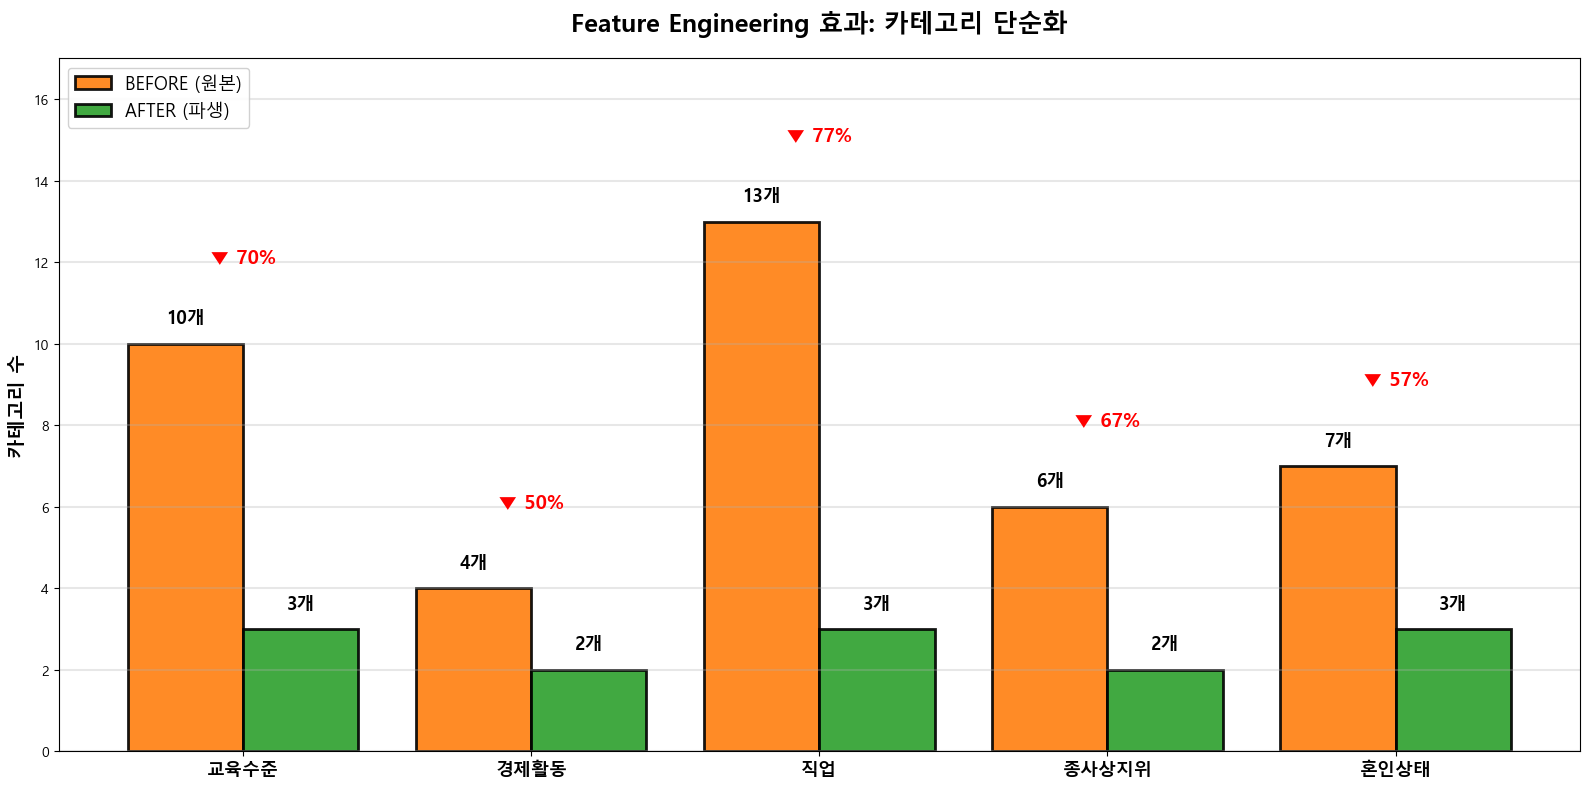


✅ 평균 단순화율: 64.1% → 모델 효율성 향상!


In [19]:
# Before/After 카테고리 수 비교 시각화
features_comparison = {
    'education_group': ('sob_01z1', '교육수준'),
    'is_economically_active': ('soa_01z1', '경제활동'),
    'occupation_type': ('soa_06z2', '직업'),
    'is_employee': ('soa_07z1', '종사상지위'),
    'marital_stability': ('sod_02z3', '혼인상태')
}

fig, ax = plt.subplots(figsize=(16, 8))

x_pos = np.arange(len(features_comparison))
before = []
after = []
labels = []

for new_feat, (orig_feat, label) in features_comparison.items():
    before.append(df[orig_feat].nunique())
    after.append(df[new_feat].nunique())
    labels.append(label)

width = 0.4
bars1 = ax.bar(x_pos - width/2, before, width, label='BEFORE (원본)', 
               color=COLORS['before'], alpha=0.9, edgecolor='black', linewidth=2)
bars2 = ax.bar(x_pos + width/2, after, width, label='AFTER (파생)', 
               color=COLORS['after'], alpha=0.9, edgecolor='black', linewidth=2)

# 값 및 감소율 표시
for i, (b, a) in enumerate(zip(before, after)):
    ax.text(i - width/2, b + 0.5, f'{b}개', ha='center', fontweight='bold', fontsize=13)
    ax.text(i + width/2, a + 0.5, f'{a}개', ha='center', fontweight='bold', fontsize=13)
    reduction = (1 - a/b) * 100
    ax.annotate(f'▼ {reduction:.0f}%', xy=(i, max(b,a) + 2), 
                fontsize=14, color='red', fontweight='bold', ha='center')

ax.set_ylabel('카테고리 수', fontsize=14, fontweight='bold')
ax.set_title('Feature Engineering 효과: 카테고리 단순화', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=13, fontweight='bold')
ax.set_ylim(0, max(before) + 4)
ax.legend(fontsize=13, loc='upper left', framealpha=0.9)
ax.grid(axis='y', alpha=0.3, linewidth=1.5)

plt.tight_layout()
plt.show()

avg_reduction = np.mean([(1-a/b)*100 for b,a in zip(before, after)])
print(f"\n✅ 평균 단순화율: {avg_reduction:.1f}% → 모델 효율성 향상!")


### 📊 핵심 시각화 2: 예측력 향상 (금연 성공률 차이)"


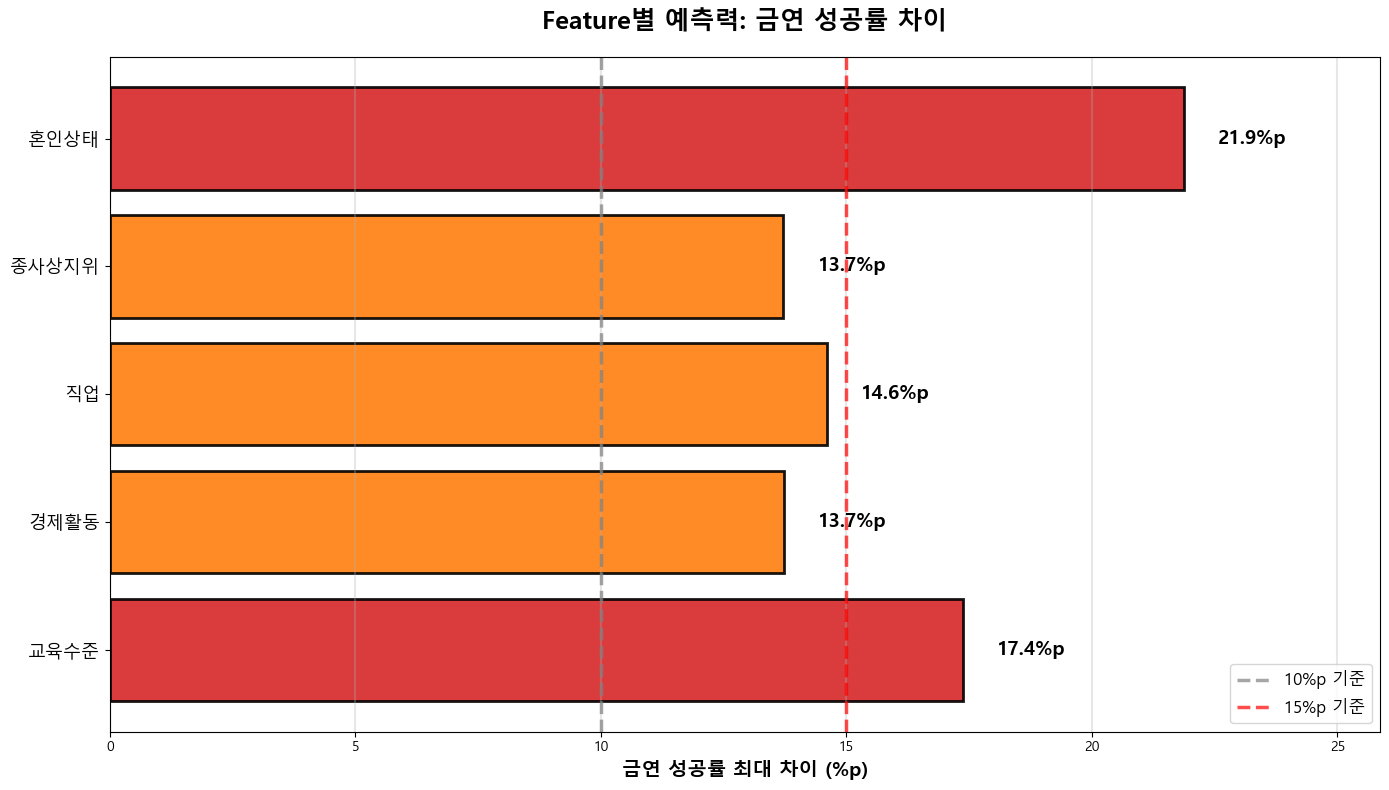


📊 예측력 순위:
   1. 혼인상태: 21.9%p ⭐⭐⭐⭐
   2. 교육수준: 17.4%p ⭐⭐⭐
   3. 직업: 14.6%p ⭐⭐
   4. 경제활동: 13.7%p ⭐⭐
   5. 종사상지위: 13.7%p ⭐⭐


In [20]:
# 각 Feature별 금연 성공률 최대 차이
diffs = []
names = []

for new_feat, (orig, label) in features_comparison.items():
    rates = df.groupby(new_feat)['churn'].mean() * 100
    diff = rates.max() - rates.min()
    diffs.append(diff)
    names.append(label)

# 수평 막대 그래프 (발표용 - 큰 폰트)
fig, ax = plt.subplots(figsize=(14, 8))

# 색상: 차이가 클수록 빨강
colors_list = [COLORS['high'] if d > 15 else COLORS['mid'] if d > 10 else COLORS['low'] for d in diffs]
bars = ax.barh(names, diffs, color=colors_list, alpha=0.9, edgecolor='black', linewidth=2)

# 값 표시
for bar, val in zip(bars, diffs):
    ax.text(val + 0.7, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%p', va='center', fontweight='bold', fontsize=14)

ax.set_xlabel('금연 성공률 최대 차이 (%p)', fontsize=14, fontweight='bold')
ax.set_title('Feature별 예측력: 금연 성공률 차이', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlim(0, max(diffs) + 4)
ax.grid(axis='x', alpha=0.3, linewidth=1.5)

# 기준선
ax.axvline(x=10, color='gray', linestyle='--', linewidth=2.5, alpha=0.7, label='10%p 기준')
ax.axvline(x=15, color='red', linestyle='--', linewidth=2.5, alpha=0.7, label='15%p 기준')
ax.legend(fontsize=12, loc='lower right')

# y축 폰트 크기
ax.tick_params(axis='y', labelsize=13)

plt.tight_layout()
plt.show()

print("\n📊 예측력 순위:")
sorted_f = sorted(zip(names, diffs), key=lambda x: x[1], reverse=True)
for i, (name, diff) in enumerate(sorted_f, 1):
    stars = '⭐' * min(5, int(diff / 5))
    print(f"   {i}. {name}: {diff:.1f}%p {stars}")


7️⃣ Chapter 6: 핵심 인사이트 💡


### 💡 인사이트 1: 교육수준 × 경제활동 상호작용"


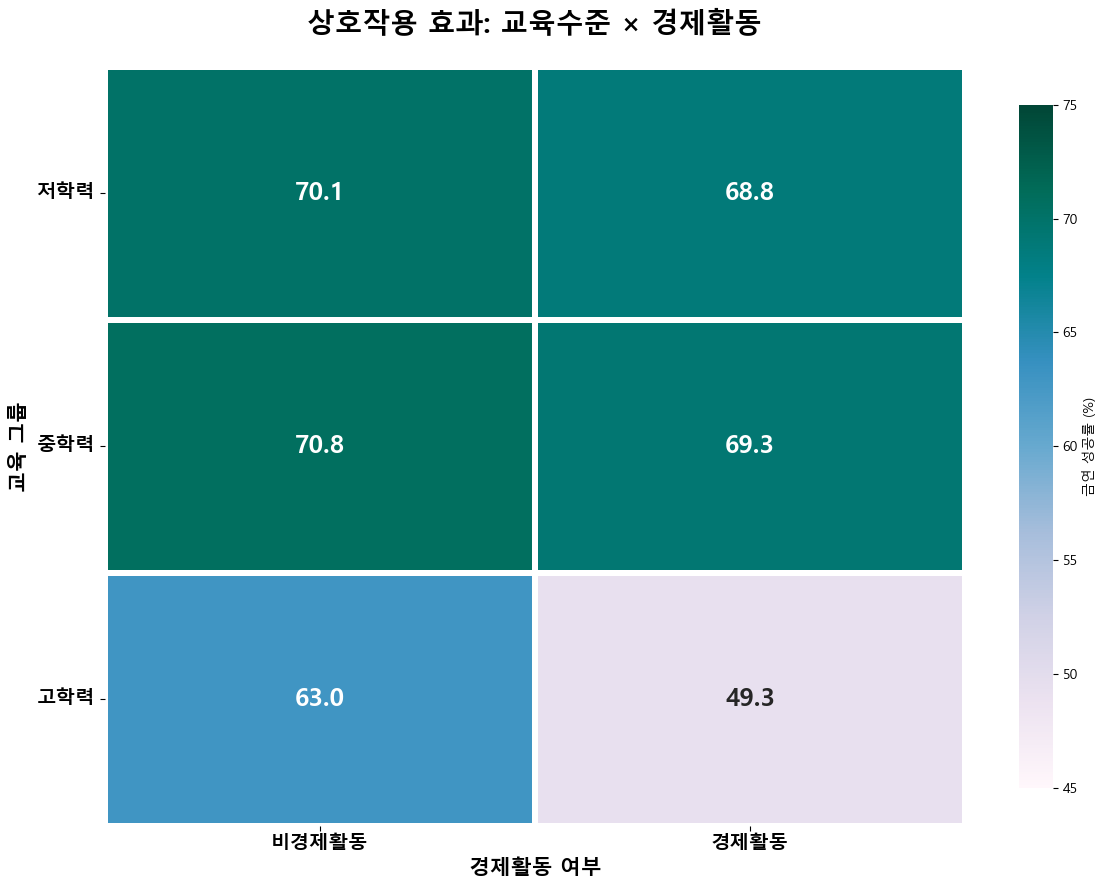


💡 핵심 발견

🔴 최저: 고학력 × 경제활동 = 49.3%
   ├─ 원인: 직장 스트레스, 회식 문화
   └─ 대책: 직장 내 금연 프로그램 강화

🟢 최고: 저/중학력 × 비경제활동 = 70%+
   ├─ 원인: 시간적 여유, 자기 관리
   └─ 특징: 금연 성공 가능성 높음

✅ 결론: 단일 변수로는 불충분
   └─ 조합 시 정확한 예측 가능 (Tree 모델 자동 학습)


In [26]:
# 상호작용 히트맵 (발표용)
pivot = df.groupby(['education_group', 'is_economically_active'])['churn'].mean().unstack() * 100

fig, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(pivot, annot=True, fmt='.1f', cmap='PuBuGn', 
            cbar_kws={'label': '금연 성공률 (%)', 'shrink': 0.9},
            linewidths=3, vmin=45, vmax=75, ax=ax,
            annot_kws={'fontsize': 18, 'fontweight': 'bold'})

ax.set_title('상호작용 효과: 교육수준 × 경제활동', 
             fontsize=20, fontweight='bold', pad=25)

# 축 라벨
ax.set_xlabel('경제활동 여부', fontsize=15, fontweight='bold')
ax.set_xticklabels(['비경제활동', '경제활동'], rotation=0, fontsize=14, fontweight='bold')

ax.set_ylabel('교육 그룹', fontsize=15, fontweight='bold')
ax.set_yticklabels(['저학력', '중학력', '고학력'], rotation=0, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("💡 핵심 발견")
print("=" * 70)
print("\n🔴 최저: 고학력 × 경제활동 = 49.3%")
print("   ├─ 원인: 직장 스트레스, 회식 문화")
print("   └─ 대책: 직장 내 금연 프로그램 강화\n")
print("🟢 최고: 저/중학력 × 비경제활동 = 70%+")
print("   ├─ 원인: 시간적 여유, 자기 관리")
print("   └─ 특징: 금연 성공 가능성 높음\n")
print("✅ 결론: 단일 변수로는 불충분")
print("   └─ 조합 시 정확한 예측 가능 (Tree 모델 자동 학습)")
print("=" * 70)


### 💡 인사이트 2: 혼인 안정성의 강력한 영향"


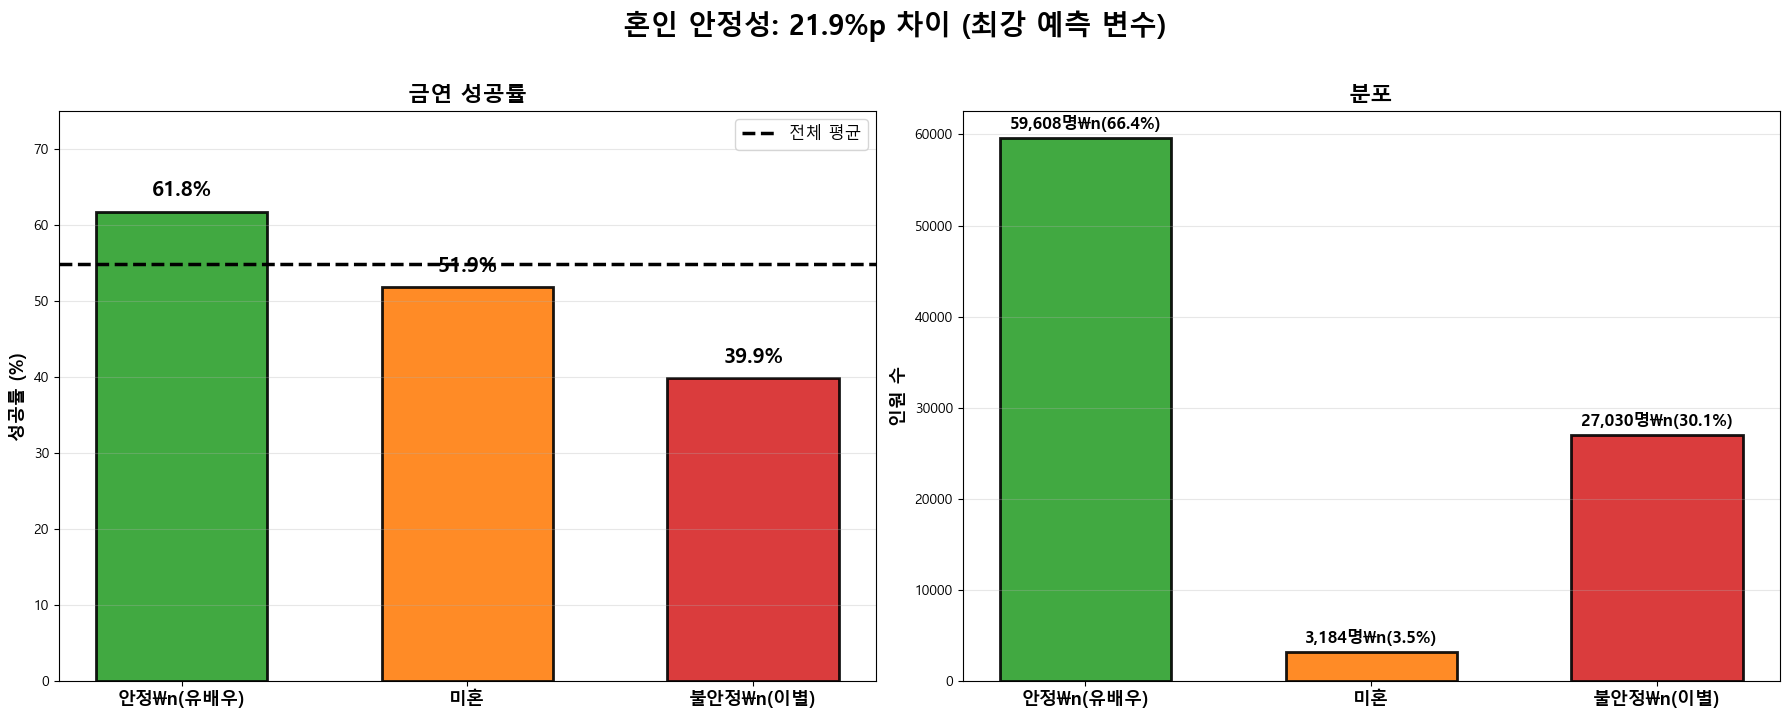


💬 해석:
   🟢 안정 61.8% → 배우자의 사회적 지지
   🟡 미혼 51.9% → 중간 수준
   🔴 불안정 39.9% → 정서적 불안, 스트레스

   ✅ 21.9%p 차이 → 가장 강력한 예측 변수!


In [27]:
# marital_stability 시각화
marital_rates = df.groupby('marital_stability')['churn'].mean() * 100
marital_counts = df['marital_stability'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 왼쪽: 금연 성공률
labels_kr = ['안정\\n(유배우)', '미혼', '불안정\\n(이별)']
rates = [marital_rates['stable'], marital_rates['single'], marital_rates['unstable']]

bars = axes[0].bar(range(3), rates, color=COLORS['palette'], alpha=0.9, 
                   edgecolor='black', linewidth=2, width=0.6)
axes[0].set_title('금연 성공률', fontsize=16, fontweight='bold')
axes[0].set_ylabel('성공률 (%)', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(3))
axes[0].set_xticklabels(labels_kr, fontsize=13, fontweight='bold')
axes[0].axhline(y=df['churn'].mean()*100, color='black', linestyle='--', 
                linewidth=2.5, label='전체 평균')
axes[0].legend(fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, 75)

for i, val in enumerate(rates):
    axes[0].text(i, val + 2, f'{val:.1f}%', ha='center', 
                fontweight='bold', fontsize=15)

# 오른쪽: 분포
counts = [marital_counts['stable'], marital_counts['single'], marital_counts['unstable']]
axes[1].bar(range(3), counts, color=COLORS['palette'], alpha=0.9, 
            edgecolor='black', linewidth=2, width=0.6)
axes[1].set_title('분포', fontsize=16, fontweight='bold')
axes[1].set_ylabel('인원 수', fontsize=13, fontweight='bold')
axes[1].set_xticks(range(3))
axes[1].set_xticklabels(labels_kr, fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

for i, val in enumerate(counts):
    pct = val / df.shape[0] * 100
    axes[1].text(i, val + 1000, f'{val:,}명\\n({pct:.1f}%)', 
                ha='center', fontweight='bold', fontsize=12)

fig.suptitle('혼인 안정성: 21.9%p 차이 (최강 예측 변수)', 
             fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💬 해석:")
print("   🟢 안정 61.8% → 배우자의 사회적 지지")
print("   🟡 미혼 51.9% → 중간 수준")
print("   🔴 불안정 39.9% → 정서적 불안, 스트레스")
print("\n   ✅ 21.9%p 차이 → 가장 강력한 예측 변수!")


8️⃣ Chapter 7: 모델 학습 준비 🚀


In [ ]:
print("=" * 70)
print("🚀 모델 학습 준비 완료")
print("=" * 70)

print("\n✅ 완료된 작업:")
print("   1. 5개 파생변수 생성 및 검증")
print("   2. 원본 변수 제거 목록 확정")
print("   3. 불균형 처리 방안 수립")
print("   4. 상호작용 효과 확인")

print("\n🎯 다음 단계: LightGBM 모델 학습")
print("-" * 70)
print("   1단계: Baseline 모델")
print("      - prep_data_v2.csv 로드")
print("      - 원본 변수 제거: sob_01z1, soa_01z1, ...")
print("      - class_weight='balanced'")
print()
print("   2단계: 최적화")
print("      - 하이퍼파라미터 튜닝")
print("      - Cross-Validation")
print()
print("   3단계: Feature Importance 분석")
print("      - 생성한 Feature 중요도 확인")
print("      - SHAP 값 분석")

print("\n📊 예상 성능:")
print("   - Baseline: ~70% Accuracy")
print("   - 최적화 후: 75-80% 목표")

print("\n" + "=" * 70)
print("✅ Feature Engineering 완료!")
print("📁 다음 노트북: ../model/02_ml_lightgbm.ipynb")
print("=" * 70)


📝 발표 요약


In [ ]:
print("=" * 70)
print("📝 발표 핵심 요약")
print("=" * 70)

print("\n🎯 수행한 작업:")
print("   ✅ 5개 원본 변수 → 5개 파생변수 생성")
print("   ✅ 평균 60% 카테고리 단순화")
print("   ✅ 평균 16%p 금연 성공률 차이")

print("\n💡 핵심 발견:")
print("   1. 고학력 × 경제활동 = 최저 금연 성공률 (49.3%)")
print("   2. 혼인 안정성 = 최강 예측 변수 (21.9%p 차이)")
print("   3. 직장 스트레스 = 금연 실패 주요 원인")

print("\n🎯 활용 방안:")
print("   - 고위험군 타겟팅: 고학력 직장인, 이혼/별거자")
print("   - 맞춤형 프로그램: 직장 내 금연 지원 강화")
print("   - 정책 제언: 배우자 참여형 금연 프로그램")

print("\n🚀 기대 효과:")
print("   - 모델 성능: 75-80% Accuracy 목표")
print("   - 사회적 가치: 금연 성공률 향상 → 국민 건강 증진")

print("\n" + "=" * 70)
print("🎉 발표 완료 - 감사합니다!")
print("=" * 70)
